In [1]:
#Import required libraries :
import pandas as pd

import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download("popular")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saishantangoli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/saishantangoli/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/saishantangoli/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/saishantangoli/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/saishantangoli/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/saishantangoli/nltk_data...
[nltk_data]    |   Pac

True

In [2]:
df_raw = pd.read_csv("/Users/saishantangoli/Desktop/Corona_NLP_test.csv")

In [3]:
df_raw.head(6)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral


In [4]:
#to get the Number of Rows, Number of Columns

print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 3798
Number of Columns: 6


In [5]:
#to check if we have any null values in the data
df_raw.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [6]:
# droping the NaN rows

df_raw.dropna(inplace = True)

In [7]:
#to check if the null values are gone

print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 2964
Number of Columns: 6


In [8]:
#to check for duplicate values
df_raw.duplicated().sum()

0

In [ ]:
#df_raw.to_csv('cleanData.csv',index=False)

In [ ]:
#df_OriginalTweet =df_raw['OriginalTweet']

In [ ]:
#df_OriginalTweet.head()

# A

In [10]:
# Tokenize each tweet in the OriginalTweet column and store the tokens in a new column
df_raw['TokenizedTweet'] = df_raw['OriginalTweet'].apply(word_tokenize)
# Print the first 5 rows of the DataFrame to check the new column
print(df_raw.head(5))


   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   
5         6       44958          Los Angeles  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   
5  Do you remember the last time you paid $2.99 a...             Neutral   

                                      TokenizedTweet  
0  [TRENDING, :, New, Yorkers, encounter, empty, ...  
1  [When, I, could, n't, find, hand, sanitizer, a...  
3  [#, Panic, buy

In [ ]:
#df.to_csv("tokenized_dataset.csv", index=False)

# B

In [13]:
#defining function to remove stop words from text data
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df_raw['Cleantweet'] = df_raw['OriginalTweet'].apply(remove_stopwords)
# Print the first 5 rows of the DataFrame to check the new column
print(df_raw.head(5))

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   
5         6       44958          Los Angeles  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   
5  Do you remember the last time you paid $2.99 a...             Neutral   

                                      TokenizedTweet  \
0  [TRENDING, :, New, Yorkers, encounter, empty, ...   
1  [When, I, could, n't, find, hand, sanitizer, a...   
3  [#, Panic, 

In [ ]:
#df.to_csv("Result_dataset.csv", index=False)

# C

In [14]:
from nltk.probability import FreqDist
# Tokenize the text in the OriginalTweet column
tokenized_tweets = df_raw['Cleantweet'].apply(word_tokenize)
# Create a frequency distribution of the words
fdist = FreqDist([word.lower() for tweet in tokenized_tweets for word in tweet])
# Print the 10 most common words and their frequencies
print(fdist.most_common(10))

[('#', 6205), ('.', 3860), (',', 2820), ('?', 1992), (':', 1939), ('https', 1481), ('coronavirus', 1186), ('covid_19', 1185), ('food', 1021), ('@', 972)]


# D

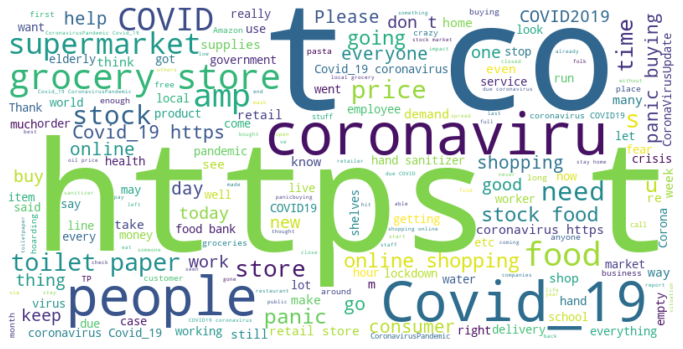

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the tweets into a single string
text = " ".join(df_raw['Cleantweet'].astype(str))

# Generate a word cloud from the text
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', random_state= 10).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




In [16]:
df_raw.to_csv("Result_dataset.csv", index=False)